In [1]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import tkinter
from tkinter import messagebox
import smtplib
root=tkinter.Tk()
import pygame
root.withdraw()
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
model =Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

In [3]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [4]:
model

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                6

In [6]:
TRAINING_DIR ="/Users/sejalnayak/Desktop/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR  ="/Users/sejalnayak/Desktop/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')



Found 1262 images belonging to 2 classes.
Found 213 images belonging to 2 classes.


In [8]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])


/Users/sejalnayak/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
127/127 [==============================] - 76s 595ms/step - loss: 0.6880 - acc: 0.6357 - val_loss: 0.2162 - val_acc: 0.9249
INFO:tensorflow:Assets written to: model2-001.model/assets
Epoch 2/10
127/127 [==============================] - 89s 702ms/step - loss: 0.3161 - acc: 0.8780 - val_loss: 0.2870 - val_acc: 0.8779
Epoch 3/10
127/127 [==============================] - 85s 670ms/step - loss: 0.3019 - acc: 0.8789 - val_loss: 0.1301 - val_acc: 0.9624
INFO:tensorflow:Assets written to: model2-003.model/assets
Epoch 4/10
127/127 [==============================] - 83s 651ms/step - loss: 0.2548 - acc: 0.9034 - val_loss: 0.1356 - val_acc: 0.9531
Epoch 5/10
127/127 [==============================] - 82s 642ms/step - loss: 0.2399 - acc: 0.9089 - val_loss: 0.1591 - val_acc: 0.9531
Epoch 6/10
127/127 [==============================] - 85s 669ms/step - loss: 0.2250 - acc: 0.9086 - val_loss: 0.1510 - val_acc: 0.9577
Epoch 7/10
127/127 [==============================] - 83s 652ms/step - l

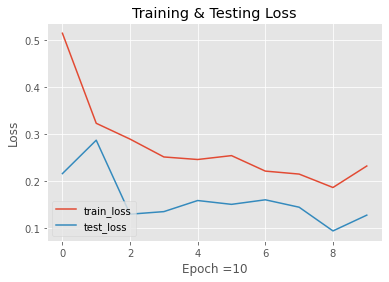

In [9]:
epochs=10
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.title("Training & Testing Loss")
plt.xlabel("Epoch =10")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

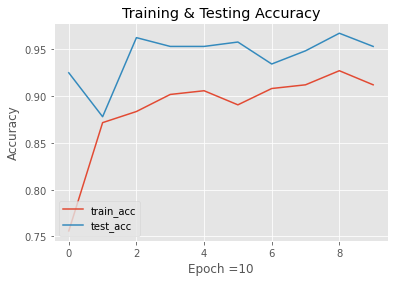

In [10]:
epochs=10
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training & Testing Accuracy")
plt.xlabel("Epoch =10")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [2]:
import cv2
import numpy as np
from keras.models import load_model
model=load_model("model2-009.model")

labels_dict={0:'without mask',1:'mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0)

### 

In [3]:
classifier = cv2.CascadeClassifier('/Users/sejalnayak/Desktop/pi/haarcascade_frontalface_default.xml')



In [4]:
SUBJECT="Subject"
TEXT="One visitor violated Face Mask policy."

In [5]:
pygame.init()
pygame.mixer.init()
sounda= pygame.mixer.Sound("/Users/sejalnayak/Desktop/beep/beep-01a.wav")

In [ ]:
while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        if(label==0):
            sounda.play()
            ##messagebox.showwarning("Warning","Access Denied,Please wear a mask")
            ##message = 'Subject: {}\n\n{}'.format(SUBJECT,TEXT)
            ##mail=smtplib.SMTP('smtp.gmail.com',587)
            ##mail.ehlo()
            ##mail.starttls()
            ##mail.login('infraking.sn@gmail.com','satish7691')
            ##mail.sendmail('infraking.sn@gmail.com','infraking.sn@gmail.com',message)
            ##mail.close
            
            
        ##elif(label!=0):
            ##messagebox.showwarning("entry allowed")
        ##else:
            ##pass
            
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()